In [3]:
import pandas as pd
import sqlite3



In [2]:
df = pd.read_csv("./data/name_basics.tsv",sep='\t')
df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0031983,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0075213,tt0038355,tt0117057,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0057345,tt0049189,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0050986,tt0083922,tt0069467"


In [3]:
df1= pd.read_csv("./data/title_basics.tsv",sep='\t')
df= pd.read_csv("./data/title_rating.tsv",sep='\t')
df2 = df1.merge(df,how = 'inner',on='tconst')

/Users/juliacooper/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df= pd.read_csv("./data/title_akas.tsv",sep='\t')
df = df.groupby(by="titleId").count()
df.reset_index(inplace=True)
df=df[['titleId','language']]
df= df.rename(columns={'titleId':'tconst'})
df2 = df2.merge(df, how = 'left', on = 'tconst')

/Users/juliacooper/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df= pd.read_csv("./data/title_crew.tsv",sep='\t')
df2 =df2.merge(df,how='left',on='tconst')

In [6]:
df= pd.read_csv("./data/title_episode.tsv",sep='\t')
df2=df2.merge(df,how='left',on='tconst')

In [1]:
#replace NA , \N
df2.parentTconst.fillna("movie",inplace=True)
df2.seasonNumber.fillna(0,inplace=True)
df2.seasonNumber.replace(r"\\N",0,regex=True,inplace=True)
df2.episodeNumber.replace(r"\\N",0,regex=True,inplace=True)
df2.episodeNumber.fillna(0,inplace=True)
df2.writers.replace(r"\\N","unknown",regex=True,inplace=True)
df2.directors.replace(r"\\N","unknown",regex=True,inplace=True)
df2.language.fillna(1,inplace=True)
df2.genres.replace(r"\\N","unknown",regex=True,inplace=True)
df2.runtimeMinutes.replace(r"\\N",0,regex=True,inplace=True)
df2.endYear.replace(r"\\N",0,regex=True,inplace=True)
df2.startYear.replace(r"\\N",0,regex=True,inplace=True)
df2.runtimeMinutes.replace("Game-Show,Reality-TV",0,inplace=True)
df2.runtimeMinutes.replace("Game-Show",0,inplace=True)
df2.runtimeMinutes=pd.to_numeric(df2.runtimeMinutes)
#convert data type
df2.isAdult=pd.to_numeric(df2.isAdult)
df2.startYear=pd.to_numeric(df2.startYear)
df2.endYear=pd.to_numeric(df2.endYear)
df2.seasonNumber=pd.to_numeric(df2.seasonNumber)
df2.episodeNumber=pd.to_numeric(df2.episodeNumber)
df2.to_csv('./data/imdbdata.csv',index=False)
df2

NameError: name 'df2' is not defined

In [8]:
#consolidate the movie data files
# import os

# directory = os.fsencode('./themoviedb')
# count = 0
    
# for file in os.listdir(directory):
#     filename = os.fsdecode(file)
     
#     file = (f'./themoviedb/{filename}')
#     if count==0:
#         df = pd.read_csv(file)
#         count+=1
#     else:
#         df1 =pd.read_csv(file)
#         df = pd.concat([df,df1],ignore_index=True)
        
# df4 = pd.read_csv('./Julia/themoviedb_id_500000_to_600000.csv',
#                  lineterminator='\n')
# df = pd.concat([df,df4],ignore_index=True)
# df.to_csv('./data/themoviedb.csv', index=False)

In [9]:
#consolidate omdb data files
# import os

# directory = os.fsencode('./omdb')
# count = 0
    
# for file in os.listdir(directory):
#     filename = os.fsdecode(file)
     
#     file = (f'./omdb/{filename}')
#     if count==0:
#         df = pd.read_csv(file)
#         count+=1
#     else:
#         df1 =pd.read_csv(file)
#         df = pd.concat([df,df1],ignore_index=True)
# df.to_csv('./data/omdb.csv', index=False)

In [8]:
#read and merge 3 data sources
df2 = pd.read_csv('./data/imdbdata.csv')
df = pd.read_csv('./data/themoviedb.csv')
df.rename(columns={'imdb_id':'tconst'},inplace=True)
df2= df2.merge(df,how='inner',on='tconst')
df2=df2.loc[df2.startYear>=1990,:]
df2=df2.loc[df2.titleType=='movie',:]
# df2.to_csv('./data/subset_movie_data_new.csv',index=False)
df = pd.read_csv('./data/omdb_visualisation.csv')
df2= df2.merge(df,how='inner',on='tconst')

/Users/juliacooper/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
#export to raw data
df2.to_csv('./data/raw_consolidate_visulalisation.csv',index=False)


In [10]:
#clean up raw data
df2 =pd.read_csv('./data/raw_consolidate_visulalisation.csv',lineterminator='\n')
# remove columns
df2=df2.drop(['titleType','originalTitle','endYear','directors','writers','seasonNumber',
              'episodeNumber','parentTconst','themoviedb_id','status','Director', 'Writer',
              'overview','Plot','DVD','production_companies_id','numVotes','rating1source',
       'rating1value', 'rating2source', 'rating2value', 'rating3source',
       'rating3value','Metascore','popularity','original_language','production_companies_name','production_countries',
       'Awards','BoxOffice','revenue','vote_average','vote_count'],axis=1)
#filter out aldult movies
df2 =df2.loc[(df2.isAdult==0) ,:]
df2['language']=df2['language'].astype(int)
df2.belongs_to_collection.fillna(0,inplace=True)
#conver flag if movie is in collection
df2['is_in_collection'] = df2.apply(lambda x: 0 if x.belongs_to_collection==0 else 1, axis=1)
#take month of release
x=df2.Released.str.split(' ',expand=True)
df2['release_month'] = x.iloc[:,1]
df2['release_month'] =  pd.to_datetime(df2['release_month'], format='%b')
df2['release_month'] = df2.apply(lambda x: x.release_month.month , axis=1)
df2.release_month.fillna(0,inplace=True)
df2['release_month']=df2['release_month'].astype(int)
df2.rename(columns={'language':'number_of_languages'},inplace=True)
#count number of popular actors/actress
df2.Actors = df2.Actors.str.lower()
x = df2.Actors.str.split(', ',expand=True).rename(columns={0:'A', 1:'B',2:'C',3:'D'})
popular = pd.read_csv('./data/popular_actor_actress.csv')
popular.names = popular.names.str.lower()
popular_names = popular.names.to_list()
x['popular1'] = x.apply(lambda y: 1 if y.A in popular_names else 0, axis=1)
x['popular2'] = x.apply(lambda y: 1 if y.B in popular_names else 0, axis=1)
x['popular3'] = x.apply(lambda y: 1 if y.C in popular_names else 0, axis=1)
x['popular4'] = x.apply(lambda y: 1 if y.D in popular_names else 0, axis=1)
x['popular']= x.popular1 + x.popular2 + x.popular3 + x.popular4
df2['popular_actors_count'] = x.iloc[:,8]

#encode rated columns
df2.Rated.fillna('unknown',inplace=True)
df2.replace({'Rated':{'TV-MA':'MA',
                      'TV-PG':'PG',
                      'Not Rated':'Unrated',
                      'TV-G':'G',
                      'APPROVED':'Approved',
                      'TV-13':'PG-13',
                      '0':'unknown',
                      'Open':'Unrated',
                      'MA-17':'MA',
                      'MA-13':'MA',
                      'M':'MA',
                      'TV-Y':'del','E10+':'del','NC-17':'del','12':'del','M/PG':'del','18':'del','X':'del','TV-Y7-FV':'del'
                      }},inplace=True)
df2 = df2.loc[(df2.Rated!='del'),:]
rate = df2.Rated.unique().tolist()
rate_counts=[]
for i in rate:
    df2[f'rated_{i}'] = df2.apply(lambda y: 1 if (y.Rated==f'{i}') else 0, axis=1)
    rate_counts.append(df2[f'rated_{i}'].sum())
#encode genre columns
x = df2.genres.str.split(',',expand=True).rename(columns={0:'A', 1:'B',2:'C'})
genre1 = x.A.unique().tolist()
genre2 = x.B.unique().tolist()
genre3 = x.C.unique().tolist()
genre = genre1 + genre2 + genre3
genre = list(set(genre))
genre_counts = []
for i in genre:
    x[f'{i}'] = x.apply(lambda y: 1 if (y.A==f'{i}') or (y.B==f'{i}') or (y.C==f'{i}') else 0, axis=1)
    df2[f'genre_{i}'] = x[f'{i}']
    genre_counts.append(df2[f'genre_{i}'].sum())

df2=df2.drop(['belongs_to_collection','Released','isAdult','Actors','genres','Rated'],axis=1)

df2.info()


/Users/juliacooper/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (30,31,32,34,35,36,37,38,39,40,41,42,43,44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 152826 entries, 0 to 153308
Data columns (total 85 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tconst                152826 non-null  object 
 1   primaryTitle          152826 non-null  object 
 2   startYear             152826 non-null  int64  
 3   runtimeMinutes        152826 non-null  int64  
 4   averageRating         152826 non-null  float64
 5   number_of_languages   152826 non-null  int64  
 6   budget                152826 non-null  float64
 7   is_in_collection      152826 non-null  int64  
 8   release_month         152826 non-null  int64  
 9   popular_actors_count  152826 non-null  int64  
 10  rated_unknown         152826 non-null  int64  
 11  rated_PG-13           152826 non-null  int64  
 12  rated_R               152826 non-null  int64  
 13  rated_Unrated         152826 non-null  int64  
 14  rated_PG              152826 non-null  int64  
 15  

In [13]:
# %pip install seaborn

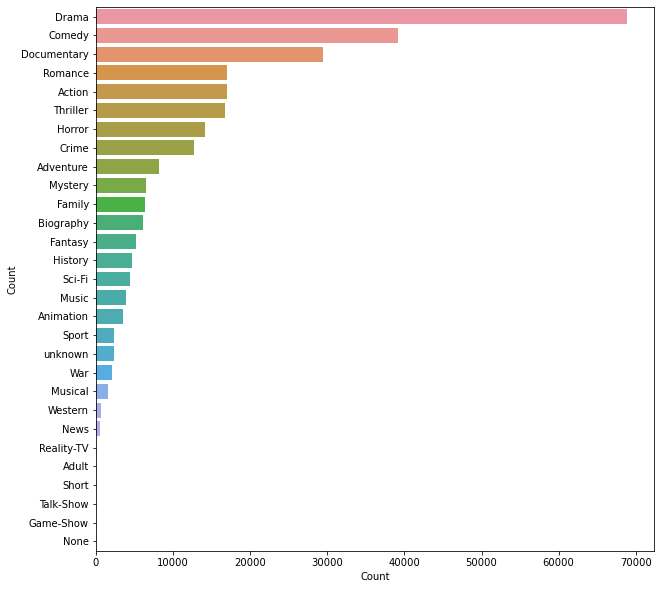

In [11]:
#plot highest to lowest by genre
all_genres = dict(zip(genre, genre_counts))
all_genres_df = pd.DataFrame({'Genre': genre, 'Count': genre_counts})
all_genres_df.fillna('None',inplace=True)
import matplotlib.pyplot as plt 
import seaborn as sns

g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(10,10))
ax = sns.barplot(data=g, x= "Count", y = "Genre")
ax.set(ylabel = 'Count')
plt.show()




In [12]:
#clean up genre columns
remove_columns_genre = all_genres_df.loc[(all_genres_df.Count<=1624) & (all_genres_df.Genre!='unknown'),: ].Genre.unique()
for i in range(0,len(remove_columns_genre)):
    remove_columns_genre[i]= 'genre_'+ remove_columns_genre[i]
df2.drop(remove_columns_genre,axis=1,inplace=True)   


In [13]:
#move average rating to the end of the dataframe
df2['AverageRating']=df2.averageRating
df2.drop(columns=['averageRating'],inplace=True)

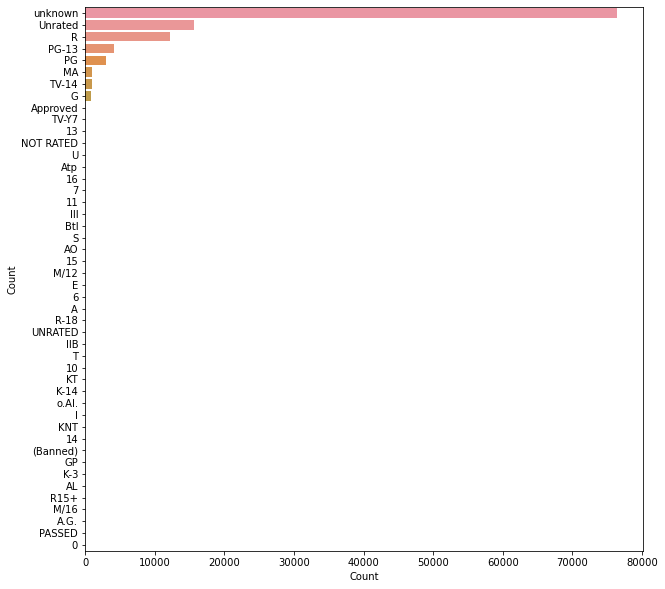

In [14]:
#plot highest to lowest by rated
all_rated = dict(zip(rate, rate_counts))
all_rated_counts = pd.DataFrame({'Rated': rate, 'Count': rate_counts})

# all_rated_counts.fillna('None',inplace=True)

r = all_rated_counts.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(10,10))
ax = sns.barplot(data=r, x= "Count", y = "Rated")
ax.set(ylabel = 'Count')
plt.show()


In [15]:
#clean up rated columns, and create rating bins
df2.drop(['rated_Approved','rated_TV-Y7'],axis=1,inplace=True)
df2['budget']=df2['budget'].astype(int)
df2['rating_bins'] = pd.cut(df2.AverageRating, [0, 2, 4, 6, 8, 10], labels=['E','D','C','B','A'],  right=False)
df2.to_csv('./data/clean_raw_visualisation.csv',index=False)

In [19]:
#machine learning
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('./data/clean_raw_data.csv')
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152815 entries, 0 to 152825
Data columns (total 75 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tconst                152815 non-null  object 
 1   primaryTitle          152815 non-null  object 
 2   startYear             152815 non-null  int64  
 3   runtimeMinutes        152815 non-null  int64  
 4   number_of_languages   152815 non-null  int64  
 5   budget                152815 non-null  int64  
 6   is_in_collection      152815 non-null  int64  
 7   release_month         152815 non-null  int64  
 8   popular_actors_count  152815 non-null  int64  
 9   rated_unknown         152815 non-null  int64  
 10  rated_PG-13           152815 non-null  int64  
 11  rated_R               152815 non-null  int64  
 12  rated_Unrated         152815 non-null  int64  
 13  rated_PG              152815 non-null  int64  
 14  rated_MA              152815 non-null  int64  
 15  

In [21]:
selected_features = df.iloc[:,2:28].values

In [22]:
y = df.iloc[:,29].values.reshape(-1,1)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=2,test_size=.7)

In [24]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300,max_features = 'sqrt',min_samples_leaf=2)
rf = rf.fit(X_train_scaled, y_train)


/Users/juliacooper/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 0.8000793335977786
Testing Data Score: 0.5700006799483239


In [27]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
search_space = {
    'n_estimators': [50,150,300],
    'max_features':['sqrt',0.8,0.2],
    'min_samples_leaf' : [1,2]
    
}

In [28]:
# Train the model with GridSearch
# grid = GridSearchCV(rf, search_space, verbose=3)

In [29]:
# grid.fit(X_train_scaled, y_train)

In [30]:
# print(grid.best_params_)
# print(grid.best_score_)

In [31]:
import joblib
joblib.dump(rf, "./random_forest.joblib")

['./random_forest.joblib']